In [1]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import jax

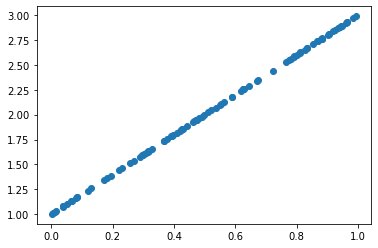

In [2]:
# Create some artificial, large data set
N = 1000000
x = np.random.uniform(size=N)
y = 1 + 2 * x 
X = np.column_stack([np.ones_like(x), x])

# Do a scatter plot with a subset of 100 points
plt.scatter(x[:100], y[:100])

In [3]:
def L(Θ, X, y):
    prediction = X @ Θ
    return jnp.mean((prediction - y)**2) #loss function 算距離

@jax.jit
def update(Θ, X, y):
    grad = jax.grad(L)(Θ, X, y)
    α = 0.1
    return Θ - α * grad


In [4]:
# Batch gradient descent
Θ = jnp.zeros(2)

for iteration in range(1000):
    Θ = update(Θ, X, y)
    if iteration % 100 == 0:
        s = np.column_stack(Θ)
        print(Θ)

[0.40004095 0.23335691]
[1.1598142 1.7014204]
[1.0424666 1.9206606]
[1.0112844 1.9789177]
[1.0029985 1.9943979]
[1.0007968 1.9985114]
[1.0002118 1.9996042]
[1.0000565 1.9998946]
[1.0000155 1.9999709]
[1.0000044 1.9999918]


In [5]:
# Sampling minibatches
batch_size = 100

def sample():
    i = np.random.choice(N, batch_size)
    return X[i], y[i]

In [6]:
# mini-batch (stochastic) gradient descent
Θ = jnp.zeros(2)

for iteration in range(1000):
    Xi, yi = sample()
    Θ = update(Θ, Xi, yi)
    if iteration % 100 == 0:
        print(Θ)


[0.4199388 0.2633462]
[1.1577177 1.7066842]
[1.0426303 1.9220031]
[1.0109085 1.9798249]
[1.0029689 1.9945723]
[1.0007931 1.9985445]
[1.0002098 1.9996104]
[1.0000563 1.9998957]
[1.0000147 1.9999721]
[1.000004  1.9999925]


In [7]:
i = np.random.choice(N, batch_size)

In [11]:
print(X[i], Xi, yi)

[[1.         0.18745272]
 [1.         0.59886581]
 [1.         0.64493768]
 [1.         0.9367676 ]
 [1.         0.54269861]
 [1.         0.62730186]
 [1.         0.34956003]
 [1.         0.852182  ]
 [1.         0.65433887]
 [1.         0.04177239]
 [1.         0.93148684]
 [1.         0.69487624]
 [1.         0.587727  ]
 [1.         0.75700471]
 [1.         0.05267567]
 [1.         0.09403406]
 [1.         0.86091624]
 [1.         0.19326908]
 [1.         0.1640206 ]
 [1.         0.78280443]
 [1.         0.94847567]
 [1.         0.66537002]
 [1.         0.40022977]
 [1.         0.01759477]
 [1.         0.06591897]
 [1.         0.63811317]
 [1.         0.9955119 ]
 [1.         0.59724846]
 [1.         0.52293529]
 [1.         0.31247587]
 [1.         0.14431403]
 [1.         0.24646654]
 [1.         0.32495746]
 [1.         0.96164694]
 [1.         0.62925694]
 [1.         0.2672386 ]
 [1.         0.65545053]
 [1.         0.94254482]
 [1.         0.01063643]
 [1.         0.66170147]
